In [48]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

######## FOR KMEANS LR=0.01, MAX_EPOCHS=30
runs_lr_0_01 = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate"],[True, True, True, True, True, True],["centroids", "margin", "kmeans",1000, 30, 0.01])
print(len(runs_lr_0_01))
run_ids_lr_0_01 = get_run_ids(runs_lr_0_01)

10


In [49]:
######## FOR KMEANS LR=0.1, MAX_EPOCHS=30
runs_lr_0_1 = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate"],[True, True, True, True, True, True],["centroids", "margin", "kmeans",1000, 30, 0.1])
print(len(runs_lr_0_1))
run_ids_lr_0_1 = get_run_ids(runs_lr_0_1)

10


In [50]:
######## FOR KMEANS LR=0.03, MAX_EPOCHS=30
runs_lr_0_03 = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate"],[True, True, True, True, True, True],["centroids", "margin", "kmeans",1000, 30, 0.03])
print(len(runs_lr_0_03))
run_ids_lr_0_03 = get_run_ids(runs_lr_0_03)

10


In [52]:
samples_labeled_lr_0_01, avg_accs_lr_0_01 = get_labeledSamples_avgAcc(run_ids_lr_0_01, tracking)
samples_labeled_lr_0_1, avg_accs_lr_0_1 = get_labeledSamples_avgAcc(run_ids_lr_0_1, tracking)
samples_labeled_lr_0_03, avg_accs_lr_0_03 = get_labeledSamples_avgAcc(run_ids_lr_0_03, tracking)

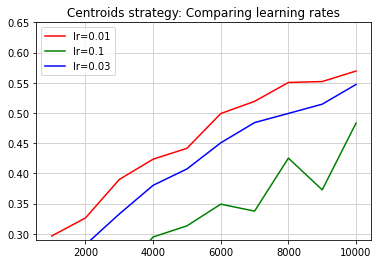

In [53]:
# plot
plt.plot(samples_labeled_lr_0_01, avg_accs_lr_0_01,color='red', label='lr=0.01')
plt.plot(samples_labeled_lr_0_1, avg_accs_lr_0_1,color='green', label='lr=0.1')
plt.plot(samples_labeled_lr_0_03, avg_accs_lr_0_03,color='blue', label='lr=0.03')
plt.legend()
plt.title(f"Centroids strategy: Comparing learning rates")
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.65])

plt.show()